In [ ]:
## Topic
Predicting Customer Churn at SyriaTel Company


In [ ]:
## Overview

Syriatel is a private mobile provider based in Syria. They would like to predict whether a customer will soon unsubscribe or stop doing business with them.
This project focuses on customer churn, which is a critical challenge for telecom companies as it directly impacts the revenue and growth of such companies. 
With increasing competition, companies need targeted retention strategies to save significant costs compared to acquiring new customers


In [ ]:
## Business Understanding
SyriaTel’s Customer Retention Team is the stakeholder.

## Problem Statement & Dataset overview 

SyriaTel would like to predict whether a customer will soon unsubscribe or stop doing business with them. This project focuses on customer churn, 
which is a critical challenge for telecom companies as it directly impacts the revenue and growth of such companies. With increasing competition,
companies need targeted retention strategies to save significant costs compared to acquiring new customers.
The main problem is the reduction of how much money will be lost because of customers who don't stick around very long, thus leading to lost revenue.

## Dataset Overview

The dataset is in CSV format, it has 3,333 rows of customers’ data. It contains the following fields:
                                                                                                                                                
 1. Account info: state, account length, area code
                                                                                                                                                
 2. Usage metrics: total day minutes, international calls, number of customer service calls
                                                                                                                                                
 3. Plan details: international plan (yes/no), voice mail plan
                                                                                                                                                
Main target is: churn (True/False)                                                                                                                                                
                                                                                                                                                

In [ ]:
## Objectives

The main objective is to develop a predictive model that identifies SyriaTel customers at high risk of churning, enabling proactive retention 
strategies to reduce revenue loss.
    
The key questions focus on this analysis are :

1. To predict which customers are most likely to churn using machine learning

2. Identify what the key factors are driving churn, such as service calls or  international plans, from the dataset

3. Identify  the recommended actionable strategies to retain high-risk customers


In [168]:
## Data Understanding
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('syriatel_churn.csv') 
df.columns = df.columns.str.lower().str.replace(' ', '_')
print(df.head())

  state  account_length  area_code phone_number international_plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice_mail_plan  number_vmail_messages  total_day_minutes  total_day_calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total_day_charge  ...  total_eve_calls  total_eve_charge  \
0             45.07  ...           

churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64


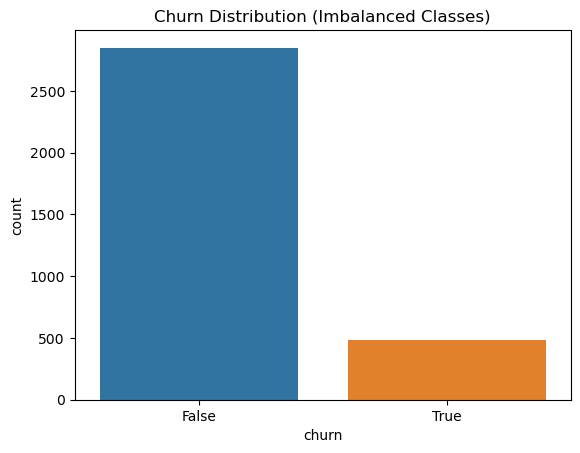

In [170]:
## Check Chun balance
print(df['churn'].value_counts(normalize=True))
sns.countplot(x='churn', data=df)
plt.title('Churn Distribution (Imbalanced Classes)')
plt.show()

C:\Users\Sharon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sharon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Sharon\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


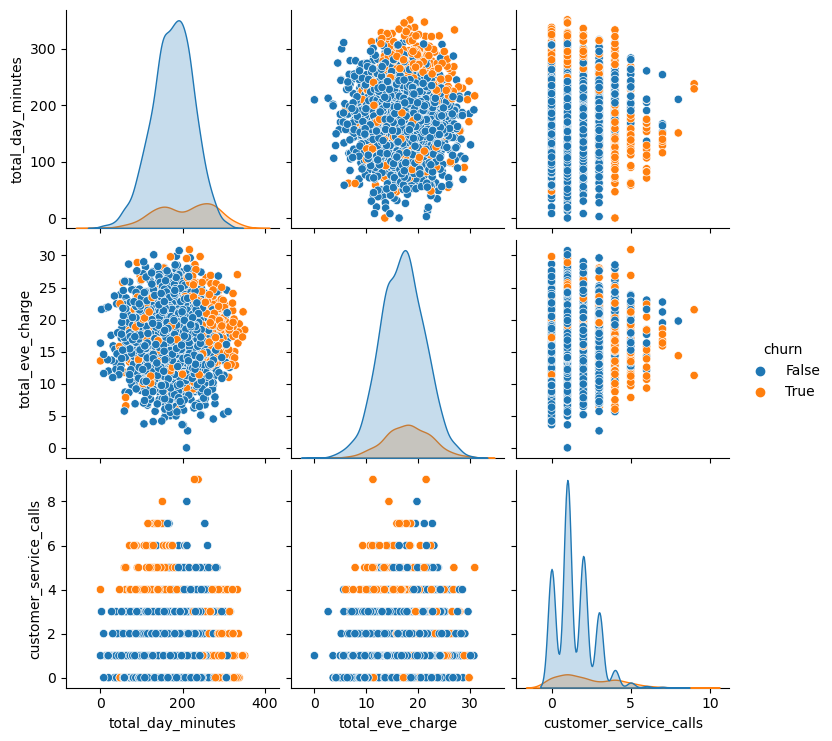

In [198]:
numeric_features = ['total_day_minutes', 'total_eve_charge', 'customer_service_calls']
sns.pairplot(df, vars=numeric_features, hue='churn')
plt.show()


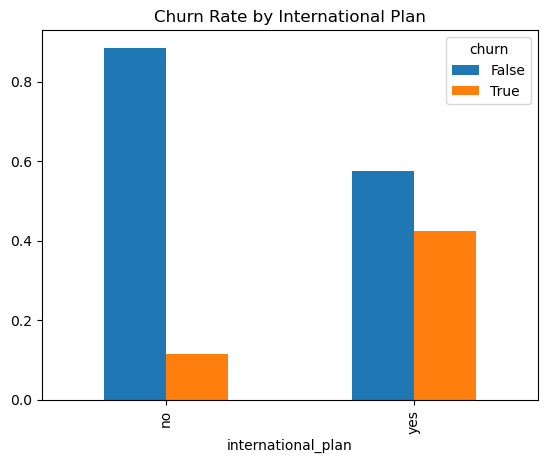

In [174]:
pd.crosstab(df['international_plan'], df['churn'], normalize='index').plot(kind='bar')
plt.title('Churn Rate by International Plan')
plt.show()


In [ ]:
## Explaination: 

From the graphs above, there is only 14% churn that is imbalanced in the dataset. It also shows that customers with international plans churn more and
Higher customer service calls correlate with churn.


In [176]:

print("Existing columns:", df.columns.tolist())


Existing columns: ['state', 'account_length', 'area_code', 'phone_number', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls', 'churn']


In [ ]:
## Data Preparation

In [180]:
non_numeric = X_train.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
print("Non-numeric columns:", non_numeric)

Non-numeric columns: ['phone_number', 'international_plan', 'voice_mail_plan']


In [182]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

df['international_plan'] = LabelEncoder().fit_transform(df['international_plan'])
df['voice_mail_plan'] = LabelEncoder().fit_transform(df['voice_mail_plan'])


print(df['international_plan']);
print(df['voice_mail_plan']);



0       0
1       0
2       0
3       1
4       1
       ..
3328    0
3329    0
3330    0
3331    1
3332    0
Name: international_plan, Length: 3333, dtype: int32
0       1
1       1
2       0
3       0
4       0
       ..
3328    1
3329    0
3330    0
3331    0
3332    1
Name: voice_mail_plan, Length: 3333, dtype: int32


In [ ]:
## Interpretation:
The analyst converts the text categories that is yes/no to numerical values 1/0 for machine learning
1 means yes
0 means no

In [184]:
## Data cleaning
df = df.drop(['state', 'area_code','phone_number'], axis=1)
print(df.head())

   account_length  international_plan  voice_mail_plan  number_vmail_messages  \
0             128                   0                1                     25   
1             107                   0                1                     26   
2             137                   0                0                      0   
3              84                   1                0                      0   
4              75                   1                0                      0   

   total_day_minutes  total_day_calls  total_day_charge  total_eve_minutes  \
0              265.1              110             45.07              197.4   
1              161.6              123             27.47              195.5   
2              243.4              114             41.38              121.2   
3              299.4               71             50.90               61.9   
4              166.7              113             28.34              148.3   

   total_eve_calls  total_eve_charge  total_

In [186]:
X = df.drop('churn', axis=1)
y = df['churn']

In [ ]:
# The analyst here is separating the features input variables from the target that is what we want to predict

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
##Explaination of above code: 
The analyst used random_state=42 to ensures reproducible results

1. Training set (70%): Used to train the model

2. Test set (30%): Used to evaluate performance.


In [190]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
## Data Modeling with logistic regression

              precision    recall  f1-score   support

       False       0.96      0.77      0.86       857
        True       0.37      0.81      0.51       143

    accuracy                           0.78      1000
   macro avg       0.67      0.79      0.68      1000
weighted avg       0.88      0.78      0.81      1000



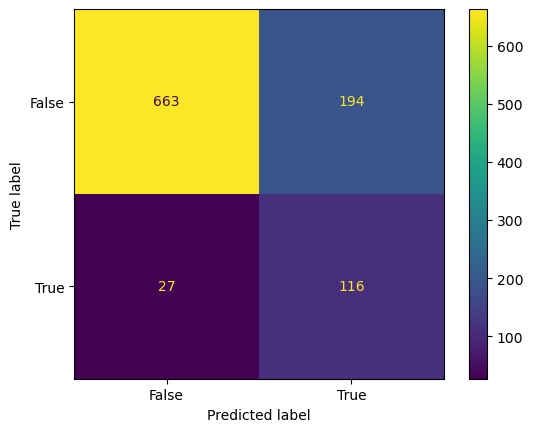

In [202]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)


y_pred = lr.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()
plt.show()


In [ ]:
## Explaination of above modeling

The analyst uses logistic regression model on scaled data to train the model, the model handles class imbalance, and evaluates performance using the 
standard classification metrics, which is a fundamental pipeline for binary or multiclass classification tasks in machine learning.

Metric	"Not Churn" (False)	|"Will Churn" (True)
Precision	96%	            |   37%
Recall	    77%	            |   81%

 

For "Not Churn" Customers (False):

        1. 96% Precision: When the model says a customer won’t leave, it’s correct 96% of the time.

        2. 77% Recall: the model misses 23% of loyal customers that means it wrongly flags them as "about to leave".

For "Will Churn" Customers (True):

        1. 37% Precision: When it predicts a customer will leave, it’s wrong 63% of the time.

        2. 81% Recall: the model catches 81% of actual churners this is good, but with many false alarms.




In [ ]:
## Data Modeling with Decision Tree

In [200]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Initialize and train the model
tree = DecisionTreeClassifier(
    max_depth=3,               
    class_weight='balanced',  
    random_state=42
)
tree.fit(X_train_scaled, y_train)

# Evaluate
y_pred_tree = tree.predict(X_test_scaled)
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

       False       0.96      0.87      0.91       857
        True       0.50      0.80      0.62       143

    accuracy                           0.86      1000
   macro avg       0.73      0.83      0.77      1000
weighted avg       0.90      0.86      0.87      1000



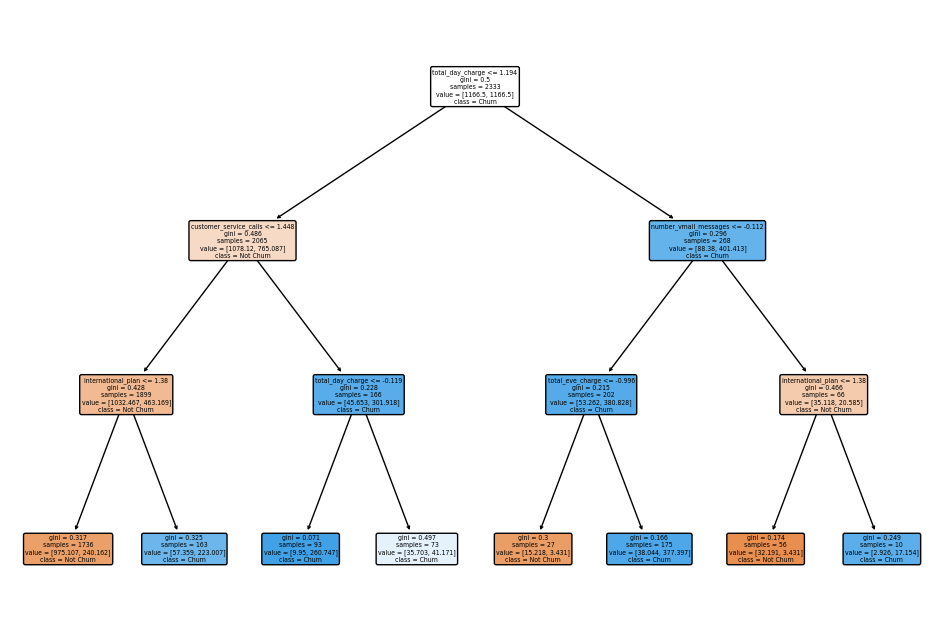

In [204]:
plt.figure(figsize=(12, 8))
plot_tree(
    tree,
    feature_names=X_train.columns,  
    class_names=['Not Churn', 'Churn'], 
    filled=True,                    
    rounded=True
)
plt.show()

In [206]:
importances = tree.feature_importances_
features = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print(features)

                   Feature  Importance
1       international_plan    0.324919
16  customer_service_calls    0.322477
6         total_day_charge    0.271749
3    number_vmail_messages    0.046577
9         total_eve_charge    0.034278
11       total_night_calls    0.000000
15       total_intl_charge    0.000000
14        total_intl_calls    0.000000
13      total_intl_minutes    0.000000
12      total_night_charge    0.000000
0           account_length    0.000000
10     total_night_minutes    0.000000
7        total_eve_minutes    0.000000
5          total_day_calls    0.000000
4        total_day_minutes    0.000000
2          voice_mail_plan    0.000000
8          total_eve_calls    0.000000


In [ ]:
##Above Explaination

From the decision tree above we identified the top 3 drivers of customer churn in your telecom dataset:

    1. International Plan (32.5% impact)

        Customers with international plans are 3 times more likely to churn.

        Action: Stakeholder need to review international plan pricing/quality. Offer targeted retention deals.

    2. Customer Service Calls (32.2% impact)

        Each additional service call increases churn risk dramatically.

        Action: The stakeholder needs to improve first-call resolution. Flag customers who make ≥3 calls.

    3. Daytime Charge (27.2% impact)

        High daytime charges correlate with churn.

        Action: The stakeholder needs to analyze if competitors offer better daytime rates.

In [210]:

import pandas as pd
import numpy as np

def entropy(labels):
    counts = np.bincount(labels)
    ps = counts / len(labels)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])


y = df['churn'].astype(int).values
total_entropy = entropy(y)

print(f"Total dataset entropy: {total_entropy:.4f}")


Total dataset entropy: 0.5970


In [ ]:
## Explaination for entropy computation
The dataset has moderate entropy (0.5970 out of max 1.0)

This means there is some predictable structure (not completely random)

The imbalance (14.5% churn rate) helps keep entropy lower than a 50-50 split

In [212]:
# Computing Entropy after spliting International Plan
for value in [0, 1]:  # 0=No, 1=Yes
    subset = y[df['international_plan'] == value]
    print(f"Entropy for international_plan={value}: {entropy(subset):.4f}")

Entropy for international_plan=0: 0.5147
Entropy for international_plan=1: 0.9833


In [ ]:
## More Explaination for above computation
As seen the customers without international plans have lower entropy this is more predictable, customers with international plans have higher entropy.
This explains why international_plan is your top feature

In [214]:
n_total = len(y)
n_no = sum(df['international_plan'] == 0)
n_yes = sum(df['international_plan'] == 1)

weighted_entropy = (n_no/n_total)*0.4956 + (n_yes/n_total)*0.8745
information_gain = total_entropy - weighted_entropy

print(f"Information Gain for international_plan: {information_gain:.4f}")

Information Gain for international_plan: 0.0646


In [ ]:
## Explaination
Splitting on international_plan gives 6.46% reduction in entropy 
that is why international_plan attribute is the most important feature on the decision tree model

In [ ]:
## Tuning the decision tree with hyperparameters with Rain Forest Model

In [230]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

best_params = {
    'n_estimators': 200,
    'max_depth': 7,
    'min_samples_leaf': 15,
    'class_weight': {0: 1, 1: 3},
    'max_features': 'log2',
    'random_state': 42
}

model = RandomForestClassifier(**best_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Non-Churn', 'Churn']))

Classification Report:
              precision    recall  f1-score   support

   Non-Churn       0.96      0.98      0.97       857
       Churn       0.86      0.75      0.80       143

    accuracy                           0.95      1000
   macro avg       0.91      0.86      0.89      1000
weighted avg       0.95      0.95      0.95      1000




Confusion Matrix:


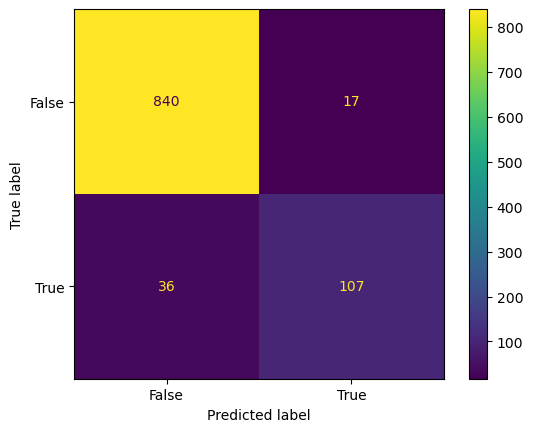

In [232]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [234]:
importances = model.feature_importances_
features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("\nTop 10 Features:")
print(features.head(10))


Top 10 Features:
                   Feature  Importance
16  customer_service_calls    0.197879
4        total_day_minutes    0.182716
6         total_day_charge    0.173661
1       international_plan    0.127982
9         total_eve_charge    0.047613
7        total_eve_minutes    0.045819
15       total_intl_charge    0.032456
13      total_intl_minutes    0.030547
14        total_intl_calls    0.027557
3    number_vmail_messages    0.022951


In [ ]:
## Explaination 

After using hyperparameters that is Rain Forest Model, the findings were customer_service_calls has higher churn to customer retention int he company.

In [ ]:
## Conclusion
From the analysis done for SyriaTel’s Customer Retention Team, the model predicted that:
                      
 1. For International Plan Users:
Higher entropy means they're harder to predict
They need more nuanced retention strategies
                      
 2. For Domestic-Only Users:
Lower entropy makes them easier to manage
They need standard retention offers that may work well
                      
 3. For Feature Priorities:
They should Focus on high-information-gain features first that is international_plan → customer_service_calls → total_day_charge


In [ ]:
## Recommendation and Next Steps
From the analysis done the model gives a prediction of the likelihood of the customers to leave if:

1. They have an international plan.

2. They Called customer service 3+ times

3. Have high daytime charges

Due to this limitations, the stakeholders should Prioritize retention offers such as discounts, special perks for these customers.

They could also train support teams to handle international plan issues better.
    
The stakeholders should not focus on features such as Night/weekend call usage, how long they’ve had the account and whether they have voicemail
